In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [6]:
import master_read as m
import efit_plots as e

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['animation.html'] = 'html5'

## EFIT part

In [5]:
efitpath = "/users/giannis_kx/eqdsks/eqdsk_9MA_SS.Gpolevoa"

In [8]:
m.read_geqdsk(efitpath);

Case Info: ['KIAM', 'SPIDER\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00\\00', '3']
nw: 256
nh: 257
rdim: 6.7
zdim: 11.4
rleft: 3.0
zmid: 0.0
rmaxis: 6.59729095
zmaxis: 0.595654498
simag: 9.28366936
sibry: 1.97410622
rcentr: 6.2
bcentr: 5.3
current: 9000000.0
fpol: 256
pres: 256
ffprim: 256
pprime: 256
psirz: (257, 256)
qpsi: 256
nbbbs: 631
limitr: 53
rbbbs: 631
zbbbs: 631
rlim: 53
zlim: 53
End of File
kvtor: 0.0
End of File
rvtor: 0.0
nmass: 0.0


In [9]:
m.struct_hor_ax_det()
e.gridsNunits()

In [10]:
psiNormGrid = e.psi_norm

## Pixie3D part

In [64]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [3]:
filepath = "/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_new/dt2.scratch./"

In [60]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 205
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Ti+Te', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [67]:
# contravariant B-field
B1 = np.squeeze(pxr.load_array(1,0,None,1))
B2 = np.squeeze(pxr.load_array(1,1,None,1))
B3 = np.squeeze(pxr.load_array(1,2,None,1))
# covariant B-field
B_1 = np.squeeze(pxr.load_array(2,0,None,1))
B_2 = np.squeeze(pxr.load_array(2,1,None,1))
B_3 = np.squeeze(pxr.load_array(2,2,None,1))
# Cartesian B-field
Bx = np.squeeze(pxr.load_array(0,0,None,1))
By = np.squeeze(pxr.load_array(0,1,None,1))
Bz = np.squeeze(pxr.load_array(0,2,None,1))
# Flux and toroidal current
psi_pol = np.squeeze(pxr.load_array(3,4,None,1))
J3 = np.squeeze(pxr.load_array(2,5,None,1))

In [119]:
B1.shape

(129, 65, 33)

In [69]:
psit = np.mean(psi_pol,axis=2)

In [70]:
pxr.Grid_for_Cell_Interpolation(B1)
pxr.Axes_of_Interpolation(psi_pol)
pxr.Grid_Cell_Interpolations(B1,B2,B3,J3)
pxr.Grid_Cell_Interpolations_Covariant(B_1,B_2,B_3)
pxr.MeshGrids_Creation()
B1,B2,B3,J3 = pxr.C2N_Evaluations()
B_1,B_2,B_3 = pxr.C2N_Evaluations_Covariant()
pxr.Grid_Interpolations(psit,B1,B2,B3,J3)

Logical Grid Interpolations done. All array (A) interpolators take A_int.


In [73]:
# Jacobian Calculation
Bsq = Bx*Bx + By*By + Bz*Bz
Bsq_ov_Jac = B1*B_1 + B2*B_2 + B3*B_3
Jac = Bsq_ov_Jac/Bsq

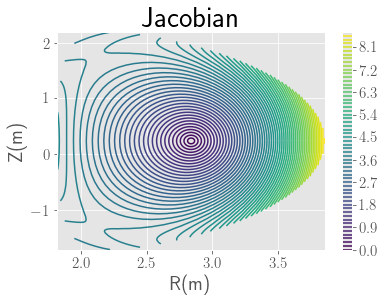

In [76]:
plt.title("Jacobian")
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],Jac[:,:,0],60)
plt.colorbar()
plt.xlabel("R(m)")
plt.ylabel("Z(m)")
plt.show()

In [78]:
from scipy.interpolate import RegularGridInterpolator

In [82]:
Jac_int = RegularGridInterpolator((pxr.r,pxr.theta,pxr.phi), Jac[:,:,:], method='linear', bounds_error=False, fill_value = 0)
J3_int = RegularGridInterpolator((pxr.r,pxr.theta,pxr.phi), J3[:,:,:], method='linear', bounds_error=False, fill_value = 0)

## Choose between integration methods

In [103]:
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.integrate import romb

In [114]:
# flux surface integral
def Vol(r):
    Vol,_ = dblquad(lambda u,f:Jac_int((r,u,f)),0,2*np.pi,lambda f:0,lambda f:2*np.pi)
    return Vol

In [126]:
Vol_dbl = Vol(65/128)
print(Vol_dbl)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


113.53742553880033


In [109]:
Vol_quad,_ = quad(lambda u:Jac_int((0.5,u,0)),0,2*np.pi)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [110]:
Vol_quad

17.80691657657675

In [113]:
Vol_romb = romb(Jac[65,:,0],dx = 2*np.pi/Jac.shape[1])
print(Vol_romb)

17.7919737517


In [124]:
def double_romb(r_ind):
    udim = Jac.shape[1]
    phidim = Jac.shape[2]
    I = np.zeros(udim) # phi integral list over all us
    for i in range(udim):
        I[i] = romb(Jac[r_ind,i,:],dx=2*np.pi/(phidim-1))
    Int = romb(I,dx=2*np.pi/(udim-1)) # u integral
    return Int

In [125]:
Vol_dromb = double_romb(65)
print(Vol_dromb)

113.536991001


Remarks: Looks like the integration using the interpolating functions and the Romberg integration using the sampled data from the arrays give the same results but the latter is much faster. So, we choose this in order to cut the step of interpolating the Jacobian.

In [127]:
def Dromb(Arr, r_ind):
    udim = Arr.shape[1]
    phidim = Arr.shape[2]
    I = np.zeros(udim) # phi integral list over all us
    for i in range(udim):
        I[i] = romb(Arr[r_ind,i,:],dx=2*np.pi/(phidim-1))
    Int = romb(I,dx=2*np.pi/(udim-1)) # u integral
    return Int

In [129]:
def FSA_denominator(jac):
    denominator = np.zeros(jac.shape[0])
    for i in range(jac.shape[0]):
        denominator[i] = Dromb(jac,i)
    return denominator

In [133]:
def FSA_numerator(A,jac):
    integrand = jac*A
    numerator = np.zeros(integrand.shape[0])
    for i in range(integrand.shape[0]):
        numerator[i] = Dromb(integrand,i)
    return numerator

In [134]:
def FSA(A,jac):
    numerator = FSA_numerator(A,jac)
    denominator = FSA_denominator(jac)
    fsa = numerator/denominator
    return fsa

In [135]:
J3_fsa = FSA(J3,Jac)

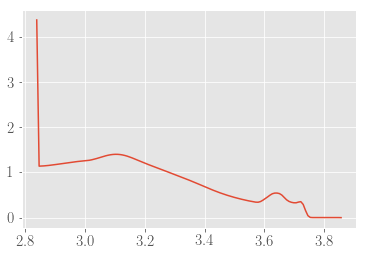

In [137]:
plt.plot(pxr.X[:,0,0],-J3_fsa)
plt.show()

In [138]:
B1t = np.mean(B1,axis=2)
B2t = np.mean(B2,axis=2)
B3t = np.mean(B3,axis=2)

In [141]:
J3_fsa_int = interp1d(pxr.r,J3_fsa)

In [142]:
pxr.Calculation_of_Units_and_Sizes()

Units and sizes calculated.


In [143]:
psi_min, norm = pxr.Normalization_numbers(psit,B1t,B2t)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


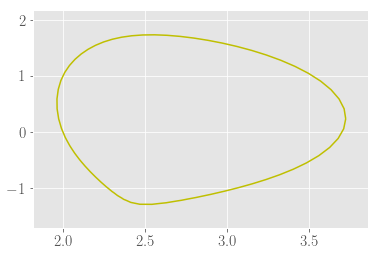

In [144]:
r_of_psi_arr, rmaxis, umaxis = pxr.create_r_psi_list(psit,B1t,B2t)

In [146]:
r_of_psi_arr

[array([ 0.171875  ,  0.26385283,  0.29619902,  0.31974564,  0.33932383,
         0.35642735,  0.37169697,  0.38560744,  0.39840932,  0.41028872,
         0.42135798,  0.43173674,  0.44155254,  0.45087999,  0.45978015,
         0.46830226,  0.47648923,  0.48435183,  0.49193211,  0.4992696 ,
         0.50638576,  0.51330025,  0.52003028,  0.52659113,  0.53299698,
         0.53925994,  0.54538159,  0.55137489,  0.55725704,  0.56303847,
         0.56872593,  0.57432663,  0.57984681,  0.58529224,  0.59066795,
         0.59597908,  0.60122964,  0.6064203 ,  0.6115539 ,  0.61663622,
         0.62167335,  0.62666749,  0.63162094,  0.63653612,  0.64141507,
         0.64625974,  0.6510719 ,  0.65585324,  0.66060552,  0.66532963,
         0.67002583,  0.6746947 ,  0.67933881,  0.68396102,  0.68856202,
         0.69314267,  0.69770401,  0.70224692,  0.70677222,  0.71128072,
         0.71577315,  0.72025024,  0.72471269,  0.72916089,  0.73359486,
         0.73801455,  0.74242149,  0.74681708,  0.7

In [50]:
from scipy.interpolate import interp1d

In [147]:
rs = r_of_psi_arr
ps = np.linspace(0,1,num=101)

In [148]:
r_p = interp1d(ps,rs)

In [149]:
efit_rs = r_p(psiNormGrid)

In [153]:
#J3s_unav = pxr.J3_int((efit_rs,0,0,0))
J3_fsa_grid = np.squeeze(J3_fsa_int(efit_rs))

In [54]:
#J3s_tp = J3tp_int((efit_rs,0))

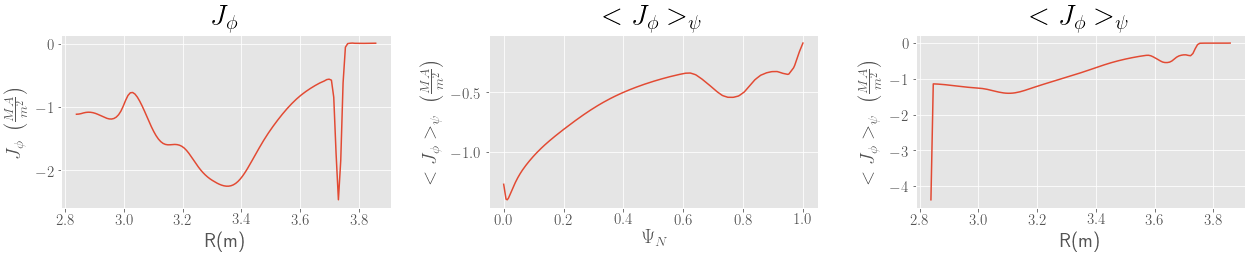

In [160]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (18,4))
ax1.set_title(r"$J_{\phi}$")
ax1.set_xlabel("R(m)")
ax1.set_ylabel(r"$J_{\phi}\;\left(\frac{MA}{m^2}\right)$")
ax1.plot(pxr.X[:,0,0],J3[:,0,0])
ax2.set_title(r"$<J_{\phi}>_{\psi}$")
ax2.set_xlabel(r"$\Psi_N$")
ax2.set_ylabel(r"$<J_{\phi}>_{\psi}\;\left(\frac{MA}{m^2}\right)$")
ax2.plot(psiNormGrid,J3_fsa_grid)
ax3.set_title(r"$<J_{\phi}>_{\psi}$")
ax3.set_xlabel("R(m)")
ax3.set_ylabel(r"$<J_{\phi}>_{\psi}\;\left(\frac{MA}{m^2}\right)$")
ax3.plot(pxr.X[:,0,0],J3_fsa)
plt.tight_layout()
plt.show()

In [161]:
np.save(filepath+"J3FSA",J3_fsa_grid)